In [1]:
# import packages
import pandas as pd
import sys
import networkx as nx 
import matplotlib.pyplot as plt

%matplotlib inline

print(f"Python version {sys.version}")
print(f"networkx version: {nx.__version__}")

# set datapath and separation parameter
datapath = "../data/cleaned/DLT-DLT.csv"
sep_parameter = ';'

# read data as data
data = pd.read_csv(datapath, sep = sep_parameter)

data.head()

Python version 3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]
networkx version: 2.7.1


,Author,Title,Co-Authors,Pagination,Published in
0,Cristian Calude,Automata: From Uncertainty to Quantum.,Elena Calude,1-14,2001
1,Elena Calude,Automata: From Uncertainty to Quantum.,Cristian Calude,1-14,2001
2,Christian Choffrut,Elementary Theory of Ordinals with Addition an...,NaN,15-20,2001
3,Zoltán Ésik,The Equational Theory of Fixed Points with App...,NaN,21-36,2001
4,Thomas Eiter,Second-Order Logic over Strings: Regular and N...,"Georg Gottlob, Thomas Schwentick",37-56,2001


In [2]:
co_authors = data['Co-Authors'].tolist()
for i in range(len(co_authors)):
    co_authors[i] = str(co_authors[i]).split(', ')
authors = data['Author'].tolist()
for i in range(len(co_authors)):
    for j in range(len(co_authors[i])):
        co_authors[i][j] = co_authors[i][j].replace('nan', '')
#co_authors

In [3]:
#Initiate network-graph
G = nx.Graph()
#G.add_nodes_from(authors)
for i in range(len(authors)//10):
    for j in range(len(co_authors[i])):
        G.add_edge(authors[i], co_authors[i][j])

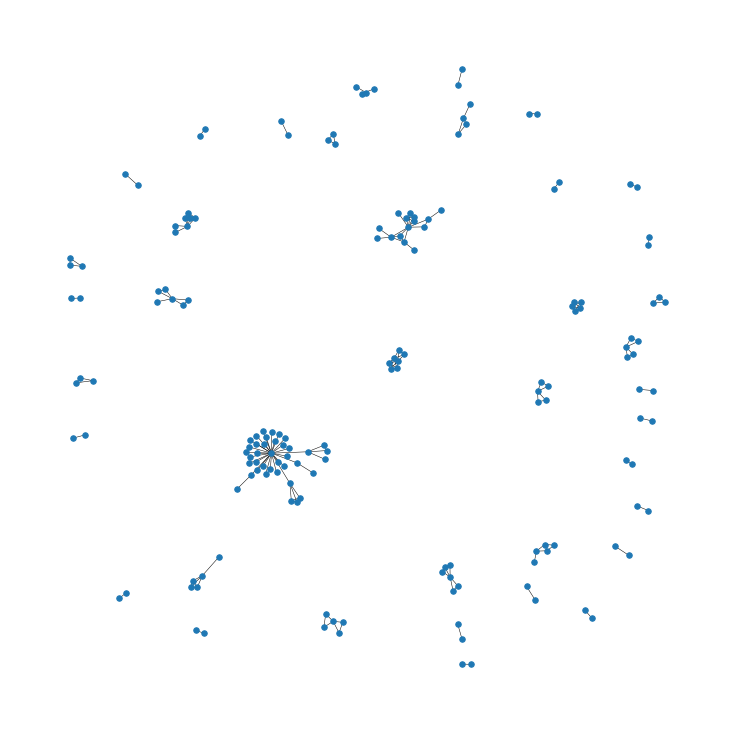

In [9]:
# larger figure size
plt.figure(3,figsize=(10,10)) 
nx.draw_spring(G, node_size=30, font_size=8, width=0.5, with_labels = False)
#print(G.number_of_nodes())
plt.show()

41


<function matplotlib.pyplot.show(close=None, block=None)>

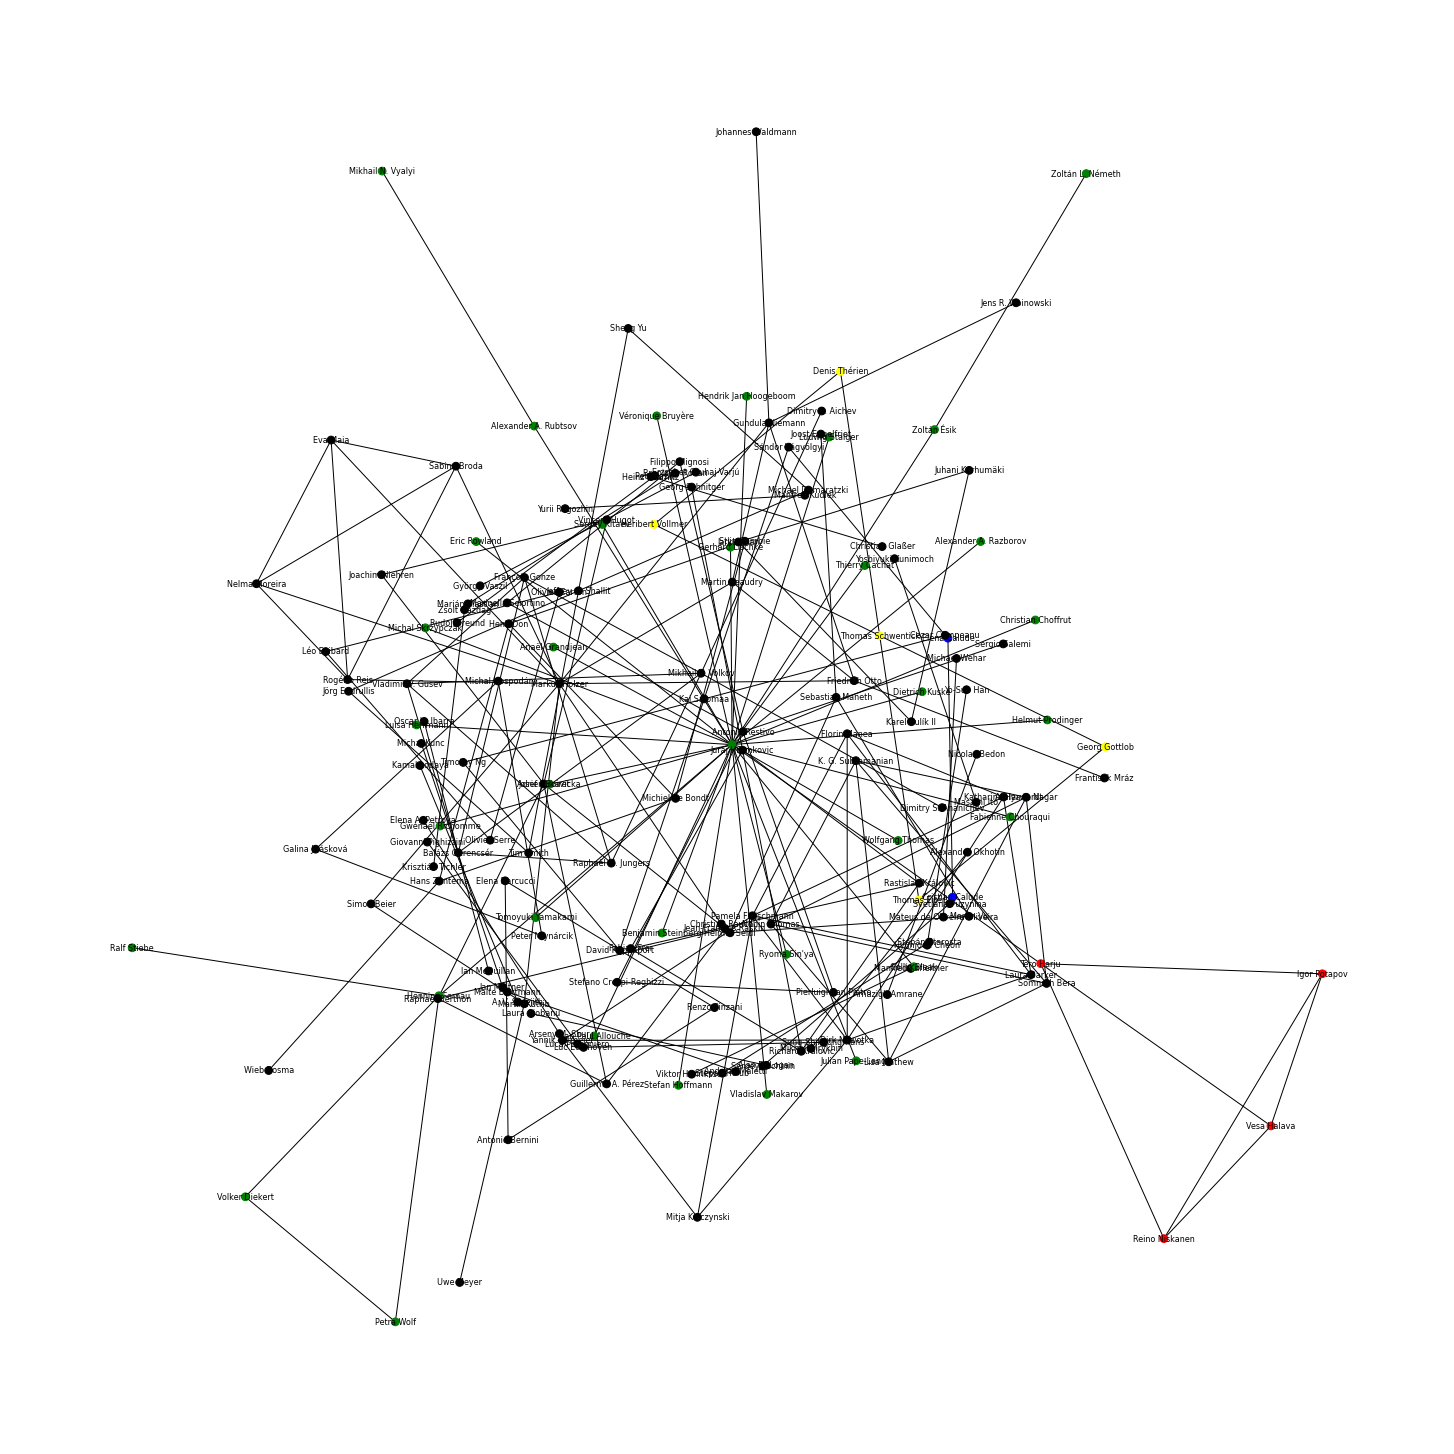

In [11]:
from networkx.algorithms import community
communities = community.girvan_newman(G)
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
#print(node_groups)
print(len(node_groups))
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]:
        color_map.append('green')
    elif node in node_groups[2]:
        color_map.append('yellow')
    elif node in node_groups[3]:
        color_map.append('red')
    else:
        color_map.append('black')

plt.figure(3,figsize=(20,20)) 
nx.draw_kamada_kawai(G, node_size=60, font_size=8, with_labels = True, node_color=color_map, width = 1)
plt.show